# **Fill this in first (double click on this cell)**


Student name: MOHAMAD ZUHAILY BIN MAHMUD

Student ID: U2004495

# **SIF2006 Optics Assignment 1: Quantifying Chromatic Abberation**




This first assignment is intended to help you get set up in the course.

For this assignment, you will be using the Google Collab in this assignment and we will be doing basic calculations and graph plotting in this Integrated Development Environment (IDE).

In order to use Google Colab, first click the `Connect` button that is beside the `Editing` tab at the top right. This will allow you to use Google's free resources to run the Python code without any installation in your computer.

## Your first computer program!

Let's learn about the `print` command.  This super useful function lets you display text.  A lot of the programming we'll do in this course will rely on using `print` to display the results of calculations.  We'll also use `print` to "debug" our code.  We'll learn more formally about what debugging means, but the general idea is that it's about diagnosing and correcting problems with your computer programs (code).  One simple debugging approach is to have your program periodically print out useful messages (using `print`) to help you understand what's happening.

The most basic way to use the `print` function is to call `print(...)`, replacing "`...`" with the text you want displayed, enclosed in single (`'`) or double (`"`) quotes, like this:

```
print('Hello, world!')
```

Modify the code in the next cell to print a greeting to yourself (e.g. "Hello, Jeremy!" or something to that effect, replacing "Jeremy" with your own name).  Check your work by pressing shift + return to run your code.  It should print out your greeting below your code. You can also click the run button to run the code.


In [ ]:
print(' ')

### Congrats, programmer!

It may not seem like much happened, but that one line of code for printing your message is a complete and valid Python 3.x computer program.  We'll be writing substantially more complicated and interesting programs in this course, but you should pat yourself on the back for reaching your first programming milestone: writing your version of the famous ["Hello, world!" program](https://en.wikipedia.org/wiki/%22Hello,_World!%22_program) that has helped introduce nearly every modern programmer to the world of coding.

## Getting help

To learn more about any Python command or function, you can type `?<function name>` into a code cell (relacing "`<function name>`" with the actual function name, e.g. `print`) and press shift + return to execute it.  Try getting help using this approach for the following functions: `print`, `input`, and `open`.  Click the `x` to close the help documentation once you're done scrolling through it.  If you're already familiar with reading [API documentation](https://en.wikipedia.org/wiki/Application_programming_interface), you may notice some interesting features of these functions.  For example, together `print`, `input`, and `open` constitute a basic but powerful set of functions that allow you to read and write to files-- including remotely (e.g., web pages)!  And don't worry if the documentation seems inscrutible right now.  As you learn more about Python programming you'll start to build up a sense of the contexts in which different parts of the documentation apply, and you'll also build up a vocabulary that will allow you to communicate (e.g., by reading and writing documentation asking questions, etc.) with other programmers.

## Using Modules and Packages

In programming, a module is a piece of software that has a specific functionality. For example, when building a ping pong game, one module would be responsible for the game logic, and
another module would be responsible for drawing the game on the screen. Each module is a different file, which can be edited separately.

To import a specific module, use the `import *` command. For a lot of applications in physics and engineering, the `numpy` and `matplotlib` modules are often used. 

>`numpy` is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 

> `matplotlib` is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.

For the next exercise, we will plot sine ($y = \sin{(x)}$) and exponential ($y=e^{x}$) functions. Here are the steps:

1. Import the `numpy` and `matplotlib` modules
2. Create a numpy array from 1 to 10 with a spacing of 0.01
3. Calculate and assign the sine and exponential of the created array into two different variables
4. Using `matplotlib`, plot a sin & exponential graph separately. Label the x- and y-axes. Don't forget to show the graph
5. Using `matplotlib` again, plot the sin & exponential graph in one graph, but with two y-axis.


<Figure size 864x648 with 0 Axes>

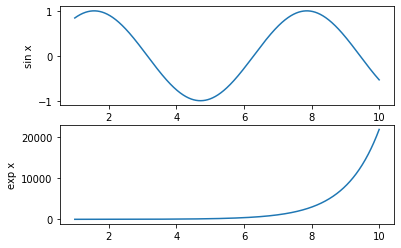

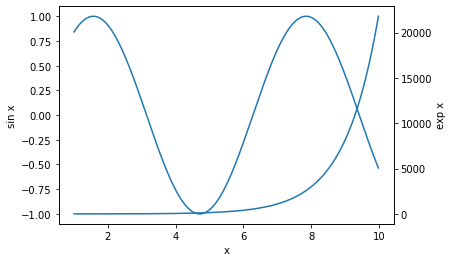

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,10,0.01)
y1 = np.sin(x)
y2 = np.exp(x)

fig = plt.figure(figsize=(12,9))
fig, axis = plt.subplots(2)
fig, axis1 = plt.subplots()
axis2 = axis1.twinx()
axis[0].set_xlabel('x')
axis[0].set_ylabel('sin x')
axis[1].set_ylabel('exp x')
axis[0].plot(x,y1)
axis[1].plot(x,y2)
axis1.set_xlabel('x')
axis1.set_ylabel('sin x')
axis2.set_ylabel('exp x')
axis1.plot(x,y1)
axis2.plot(x,y2)



## Now for some physics

You that you can calculate and plot, we can now do some physics with Python. We would now want to the refractive index of silica (SiO$_2$) and MgF$_2$. The refractive index of both materials can be calculated via the Sellmeier equation given by,

$n(\lambda)^2 = 1 + \sum\limits_n \left[ \frac{A_n \lambda^2}{\lambda^2 - B_n^2} \right]$

where $n$ is the refractive index, $\lambda$ is the wavelength, and $A_n$ and $B_n$ are constants. These constants are provided below:

Material  | A$_1$ | B$_1$ | A$_2$ | B$_2$ | A$_3$ | B$_3$ 
-------------------|------------------|-------------------|------------------|-------------------|------------------|-------------------
Silica       | 0.6961663 | 0.0684043 | 0.4079426 | 0.1162414 | 0.8974794 | 9.896161
MgF$_2$       | 0.48755108 | 0.04338408| 0.39875031 | 0.09461442 | 2.3120353 | 23.793604

Plot the refractive index of both materials on the same plot for wavelengths of between $\lambda = 0.4 - 1.0 \mu$m

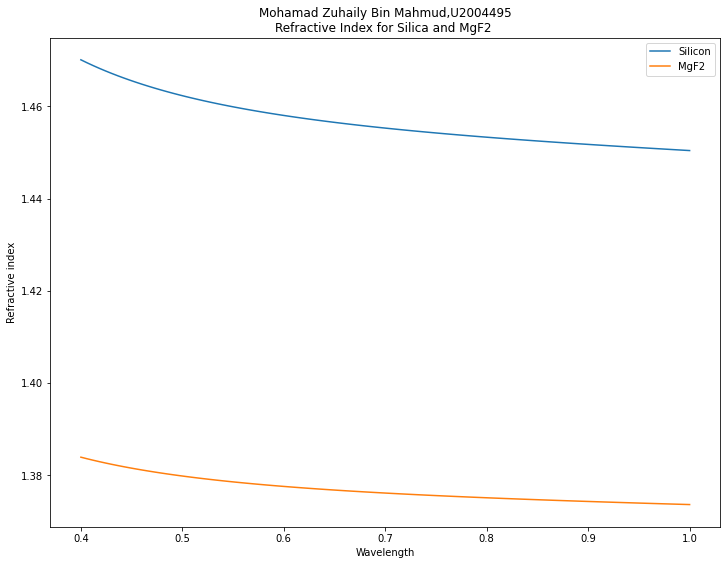

In [ ]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt

#Declare constant
valA = [[0.6961663,0.4079426,0.8974794],[0.48755108,0.39875031,2.3120353]] #row = material , col = An
valB = [[0.0684043,0.1162414,9.896161],[0.04338408,0.09461442,23.793604]] #row = material , col = Bn
name = ["Silicon","MgF2"]
lamda = np.linspace(0.4,1.0,100)

#Variable to save value of n
w,h = len(lamda),2
yval=[[0 for x in range(w)] for y in range(h)] #size of 2x100

#Function to calculate n
def ref(a,b,k):
  for n in range(len(k)):
    sum=0
    for i in range(3):
      sum += a[i]*(k[n]**2)/((k[n]**2)-(b[i]**2))
      yval[p][n]=np.sqrt(1+sum) # save for row p and col n

#Initiate calculation process
p=0   #counter use to save data
for g in range(len(valA)):
  ref(valA[g],valB[g],lamda)
  p+=1

#Create figure
fig = plt.figure(figsize=(12,9))
ax1=fig.add_subplot()

#Plot data
for l in range(len(yval)):
    ax1.plot(lamda, yval[l],label=name[l])

#Plot accesories
ax1.set_xlabel('Wavelength')
ax1.set_ylabel('Refractive index')
ax1.title.set_text('Mohamad Zuhaily Bin Mahmud,U2004495\nRefractive Index for Silica and MgF2 ')
ax1.legend()
plt.show()



Next, by using the lensmaker equation $\left(\frac{1}{f} = \frac{n_2 - n_1}{n_1}\left[\frac{1}{R_1} - \frac{1}{R_2}\right] \right)$ and assuming a thin lens, which allows us to use the thin lens equation: $\left( \frac{1}{f} = \frac{1}{s} + \frac{1}{s'} \right)$, plot the image location ($s'$) for $\lambda = 0.4 - 1.0 \mu$m for an object located 40 cm away from the centre of a lens for silica and MgF$_2$ lenses with:

1.   $R_1$ = 20 cm, $R_2$ = 20 cm
2.   $R_1$ = 10 cm, $R_2$ = 30 cm
3.   $R_1$ = 20 cm, $R_2 = \infty$



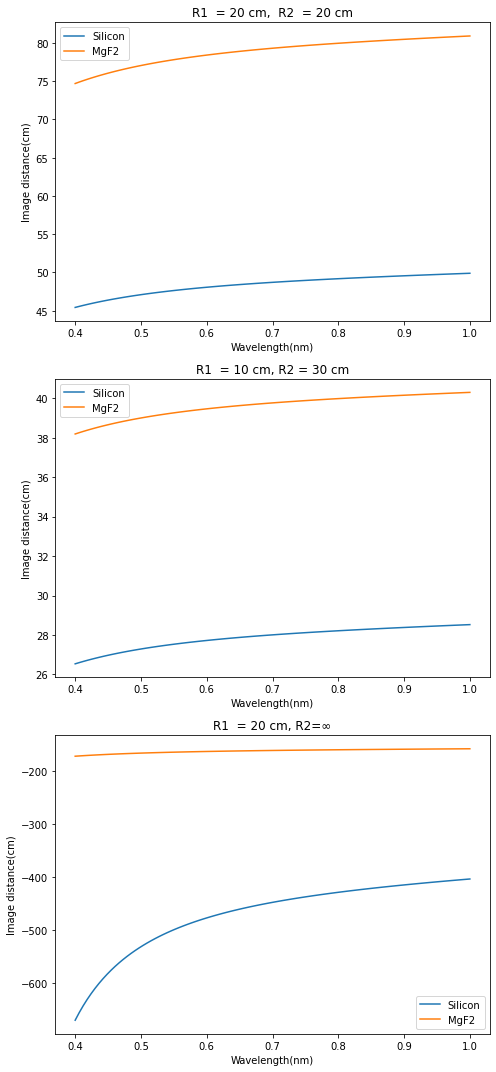

In [ ]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#Declare constants
valA = [0.6961663,0.4079426,0.8974794],[0.48755108,0.39875031,2.3120353] #row = material , col = An
valB = [0.0684043,0.1162414,9.896161],[0.04338408,0.09461442,23.793604] #row = material , col = Bn
name = ["Silicon","MgF2"]
lamda = np.linspace(0.4,1.0,100)
n1 = 1
R1=[20,10,20]
R2=[-20,-30,-np.inf]
s=40

#Create 3d array to save data
x = 3
y = 2
z = 100
image = []
for i in range(x): #size of 3x2x100, 3 for numbers of scenes, 2 for number of material and 100 for number of wavelength
    image.append([])
    for j in range(y):
        image[i].append([])
        for k in range(z):
            image[i][j].append(0)

#Function to calculate data
def ref(a,b,k,r1,r2):
    for n in range(len(k)):
     sum=0
     for i in range(3):
       sum += a[i]*(k[n]**2)/((k[n]**2)-(b[i]**2))
     n2=(np.sqrt(1+sum))
     f=1/(((n2-n1)/n1)*((1/r1)-(1/r2)))
     image[q][p][n]=(1/((1/f)-(1/s))) # save for row q, col p, depth n  

#Initiate calculation process
p=0
q=0
for j in range(3):
  for g in range(len(valA)):
    ref(valA[g],valB[g],lamda,R1[j],R2[j])
    p+=1
  p=0
  q+=1

#Create figure
fig = plt.figure(figsize=(7,15))
gs  = gridspec.GridSpec(3, 1,height_ratios=[1, 1 ,1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])

#Plot data and it's accesories
ax0.plot(lamda, image[0][0],label=name[0])
ax0.plot(lamda, image[0][1],label=name[1])
ax0.set_title('R1  = 20 cm,  R2  = 20 cm')
ax0.set_xlabel('Wavelength(nm)')
ax0.set_ylabel('Image distance(cm)')
ax0.legend()

ax1.plot(lamda, image[1][0],label=name[0])
ax1.plot(lamda, image[1][1],label=name[1])
ax1.set_title('R1  = 10 cm, R2 = 30 cm')
ax1.set_xlabel('Wavelength(nm)')
ax1.set_ylabel('Image distance(cm)')
ax1.legend()

ax2.plot(lamda, image[2][0],label=name[0])
ax2.plot(lamda, image[2][1],label=name[1])
ax2.set_title('R1  = 20 cm, R2=∞')
ax2.set_xlabel('Wavelength(nm)')
ax2.set_ylabel('Image distance(cm)')
ax2.legend()

plt.tight_layout()

plt.show()

Calculate the Abbe number ($\nu_D$) for SiO$_2$ and MgF$_2$. Then, calculate the difference between the focal length of the blue Fraunhofer F line from Hydrogen ($f_F$) and red Fraunhofer C line from Hydrogen ($f_C$) from the focal length of the orange Fraunhofer D line from sodium ($f_D$) via:

$f_F - f_C = -\frac{f_D}{\nu_D}$

for a silica and MgF$_2$ lens with $R_1$ = 20 cm, $R_2$ = 20 cm.

In [ ]:
#Declare libraries
import numpy as np
import matplotlib.pyplot as plt

#Declare constant
valA = [0.6961663,0.4079426,0.8974794],[0.48755108,0.39875031,2.3120353] #row = material , col = An
valB = [0.0684043,0.1162414,9.896161],[0.04338408,0.09461442,23.793604] #row = material , col = Bn
name = ["Silicon","MgF2"]
wavename=["blue Fraunhofer F from hydrogen","orange Fraunhofer D from sodium","red Fraunhofer C from hydrogen" ]
wvlen = [0.4861,0.5892,0.6563] #wavelength for blue, orange and red accordingly in mirco meter

n1=1
r1 = 20
r2 = -20
Sodium_nD=0.054001 #refraction index for orange in sodium

delta=[] #variable to save the results value

#Function to calculate results
def ref(a,b,k):
  n=[]
  for j in range(len(k)):
    sum=0
    for i in range(3):
      sum += a[i]*(k[j]**2)/((k[j]**2)-(b[i]**2))
    n.append(np.sqrt(1+sum))
  abbe = 1/((n[0]-n[2])/(n[1]-1))
  focd = 1/(((Sodium_nD-n1)/n1)*((1/r1)-(1/r2)))
  print(name[p],"abbe",abbe,"focal",focd)
  delta.append(-(focd/abbe)) 

#Initiate calculation process
p=0   #counter use to save data
for g in range(len(valA)):
  ref(valA[g],valB[g],wvlen)
  p+=1

#Print results
for k in range(2):
  print("Difference",name[k], delta[k])

Silicon abbe 67.78589952113404 focal -10.570835698557818
MgF2 abbe 106.1668136404246 focal -10.570835698557818
Difference Silicon 0.15594446298174566
Difference MgF2 0.09956817329339923


**Create** three different ray-transfer matrices functions for the following cases:

1.   Translation matrix
2.   Refraction at a spherical interface
3.   Reflection at a spherical surface

Using these three functions, calculate the matrix for a thick lens with $R_1$ = 30 cm, $R_2 = \infty$

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

#declare constant
nlen=1.5
nair=1
r1 = 30
r2 = np.inf
x = 10

#create the matrix
m1 = [[1,0],[((nair-nlen)/(r1*nlen)),(nair/nlen)]]
m2 = [[1,x],[0,1]]
m3 = [[1,0],[(2/r2),1]]

#find the result matrix
M = np.dot(m3,np.dot(m2,m1))

#print final product
print("m1\n",m1,"\n\n","m2\n",m2,"\n\n","m3\n",m3,"\n\n","M\n",M)

m1
 [[1, 0], [-0.011111111111111112, 0.6666666666666666]] 

 m2
 [[1, 10], [0, 1]] 

 m3
 [[1, 0], [0.0, 1]] 

 M
 [[ 0.88888889  6.66666667]
 [-0.01111111  0.66666667]]
